## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

## Loading Data

In [3]:
data = pd.read_csv('train.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


## Eda

In [4]:
data.shape

(700, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
data=data.dropna(axis=0)

In [8]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [9]:
data.isnull().sum()

x    0
y    0
dtype: int64

## Spliting Data

In [56]:
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)


test_input= np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [57]:
train_output.shape

(500, 1)

In [58]:
train_input.shape

(500, 1)

In [59]:
test_input.shape

(199, 1)

In [60]:
test_output.shape

(199, 1)

# LINEAR REGRESSION

## Train the Data

Sequence of steps:

    Forward Propogation \n
    
    Cost Function\n
    
    Backward Propogation\n
    
    Update Parameters
    

## Forward Propogation

y=mx+c
,where m and c are the parameters that our model will learn through learning

In [61]:
def forward_propogation(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    
    y_pred= np.multiply(m,train_input)+c
    return y_pred

## Defining the Cost Function

### Mean Squared Error ,Cost = [(y-f(x))^2] / 2n
where y are the actual or true value and f(x) are predicted values

In [62]:
def cost_function(predictions,train_outout):
    cost=np.mean((train_output - predictions) **2) * 0.5
    return cost

## Gradient Descent for Backward Propogation

In [63]:
def backward_propogation(train_input,train_output,predictions):
    derivatives=dict()
    df=(train_output - predictions) * -1
    dm=np.mean(np.multiply(train_input,df))
    dc=np.mean(df)
    
    derivatives['m']= dm
    derivatives['c']= dc
    
    return derivatives

## Updating the Parameters

### m=m- (learning rate * dm) 
### c=c- (learning rate * dc) 

In [64]:
def update_parameters (parameters,derivatives,learning_rate):
    parameters['m']= parameters['m']- learning_rate * derivatives['m']
    parameters['c']= parameters['c']- learning_rate * derivatives['c']
    
    return parameters

In [65]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
def train(train_input,train_output,learning_rate,iters):
    
    parameters= dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    loss=list()
    
    
    for i in range (iters):
        
        predictions=forward_propogation(train_input,parameters)
        
        cost=cost_function(predictions,train_output)
        
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        ax.plot(train_input,train_output,'+',label='original')
        ax.plot(train_input,predictions,'*',label='training')
        legend=ax.legend()
        
        plt.plot(train_input,train_output,'+')
        plt.plot(train_input,predictions,'*')
        plt.show()
        
        derivatives= backward_propogation(train_input,train_output,predictions)
        
        parameters=update_parameters(parameters,derivatives,learning_rate)
        
    return parameters,loss

Iteration = 1, Loss = 5442.058945316452


<Figure size 432x288 with 0 Axes>

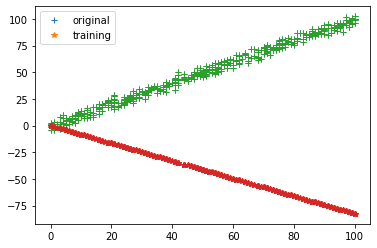

Iteration = 2, Loss = 2471.2056172839734


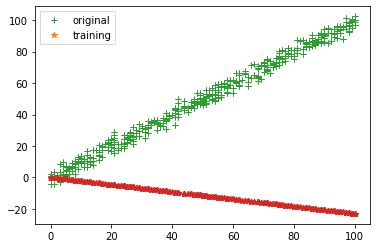

Iteration = 3, Loss = 1123.3261716545721


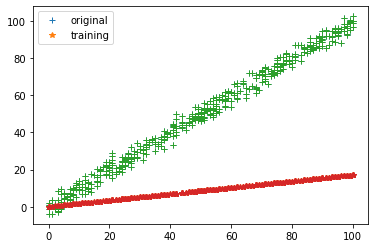

Iteration = 4, Loss = 511.7917741442127


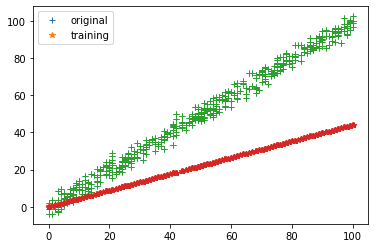

Iteration = 5, Loss = 234.33794057158863


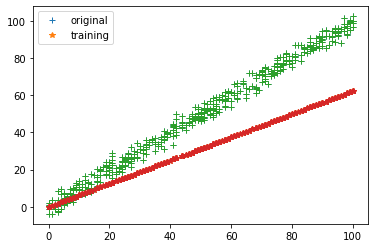

Iteration = 6, Loss = 108.45682889891965


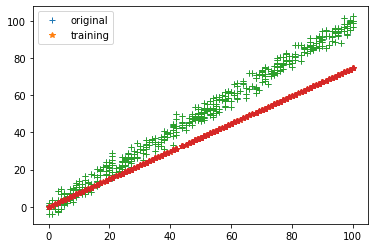

Iteration = 7, Loss = 51.344429040457065


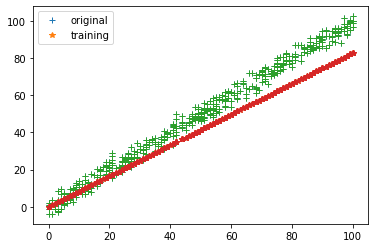

Iteration = 8, Loss = 25.43246990316247


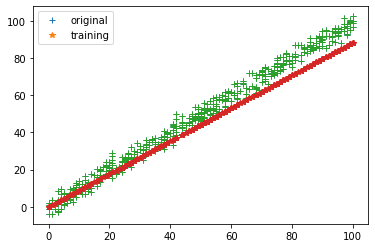

Iteration = 9, Loss = 13.67618527995895


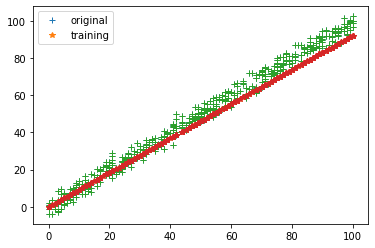

Iteration = 10, Loss = 8.342345863210147


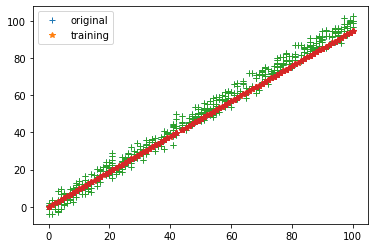

Iteration = 11, Loss = 5.922376950397931


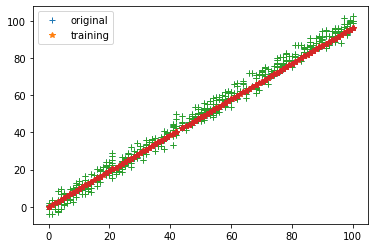

Iteration = 12, Loss = 4.824434312747918


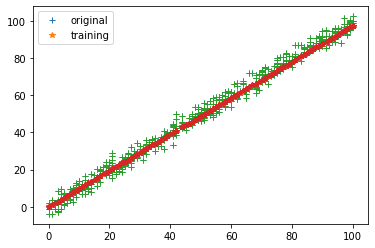

Iteration = 13, Loss = 4.326296460472877


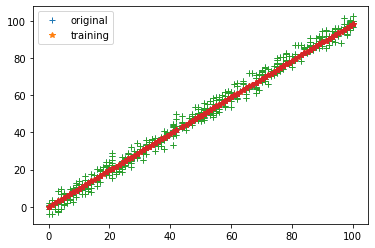

Iteration = 14, Loss = 4.100290703694063


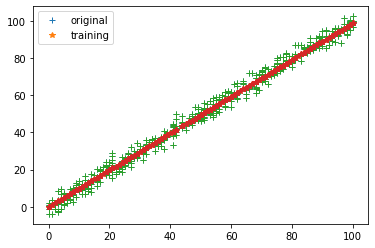

Iteration = 15, Loss = 3.997751580069704


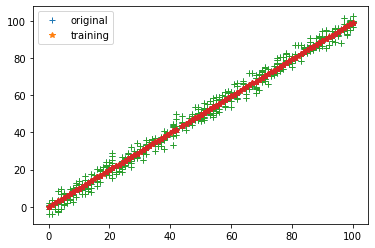

Iteration = 16, Loss = 3.9512294046673437


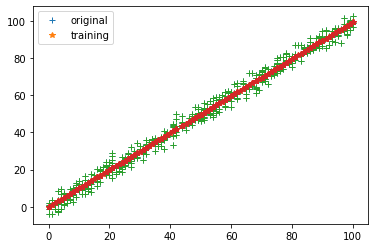

Iteration = 17, Loss = 3.9301221807230835


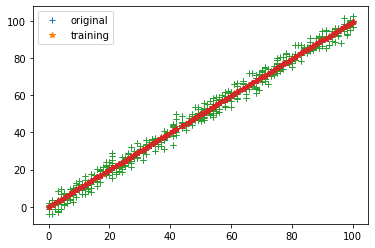

Iteration = 18, Loss = 3.9205457484091046


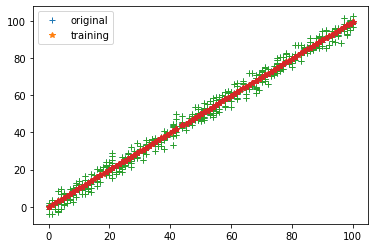

Iteration = 19, Loss = 3.916200849032859


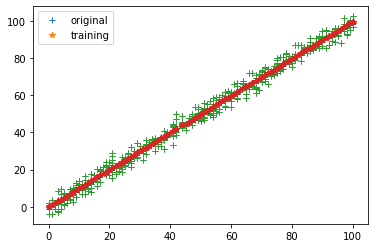

Iteration = 20, Loss = 3.9142295019482174


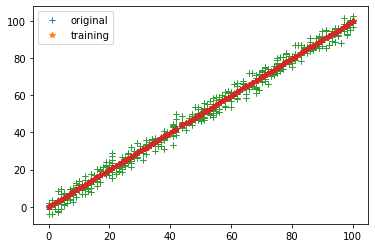

In [66]:
parameters,loss = train(train_input,train_output,0.0001,20)

In [67]:
print(parameters)

{'m': 0.9983092689492454, 'c': -0.10293143801703096}


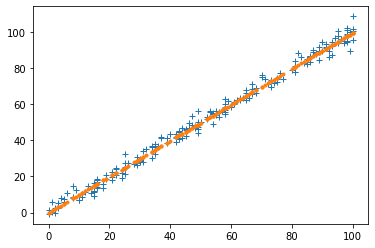

In [68]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [69]:
cost_function(test_predictions, test_output)

ValueError: operands could not be broadcast together with shapes (500,1) (199,1) 